
# Семинар 3. KNN

#### Задача 1.
Предположим, мы решаем задачу классификации на три класса по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 1         | -1        | 1     |
| 2         | 2         | 1     |
| 3         | 2         | 2     |
| 1         | 0         | 3     |
| 2         | -2        | 3     |

Каковы будут предсказания для объекта $x=(2, -1)$?

__Решение.__

Алгоритм предсказания kNN для задачи классификации:
1. Вычислить расстояние от каждого объекта обучающей выборки до тестового объекта.
1. Найти k объектов обучающей выборки (соседей) с наименьшим расстоянием до тестового объекта.
1. Вернуть наиболее встречающийся класс среди k соседей.

Вычислим расстояния. Расстояние от первого объекта в обучении до тестового объекта $x$ (манхэттанская метрика):

$$|1-2| + |-1-(-1)| = 1.$$

Аналогично для 2-5 объектов: получатся расстояния 3, 4, 2, 1.

Находим 3 ближайших объекта: это объекты с номерами 1, 4, 5 (расстояния 1, 2, 1 соответственно). Эти три объекта относятся к классам 1, 3, 3. Чаще всего встречается класс 3, поэтому предсказываем 3.

#### Задача 2.
Визуализируйте разделяющую поверхность между классами для следующей выборки:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 2         | 2        | 1     |
| 3         | 2         | 1     |
| 2         | 0         | 2     |
| 1         | -1         | 3     |
| 1        | 1        | 3     |

Используйте k=1 и евклидово расстояние.

**Решение.**

В задачах классификации с двумя признаками мы можем изобразить признаковое пространство на плоскости и раскрасить его в разные цвета в соответствии с классом каждой точки плоскости. В этом и состоит сейчас наша задача.

Для начала отобразим на плоскости обучающую выборку - пять точек - в соответствии с их координатами.

При $k=1$ каждая точка плоскости будет относиться к тому же классу, что и ближайший к ней объект обучающей выборки. Если нам даны две точки разных классов, то чтобы провести между ними границу классов, нужно построить серединный перпендикудяр. Для случая с несколькими точками нужно построить несколько серединных перпендикуляров, найти их точки пересечения и определить, какие области к каким классам относятся. Более строго такая конструкция задается с помощью [Диаграммы Вороного](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D0%BE%D0%B3%D0%BE), но мы не будем вдаваться в ее детали.

<div>
<img src="classifi.png" width="350"/>
</div>

#### Задача 3.
Предположим, мы решаем задачу регрессии по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Ответ |
|-----------|-----------|-------|
| 1         | -1        | 3.5     |
| 2         | 2         | 2.3     |
| 3         | 2         | 1.7     |
| 1         | 0         | -0.4     |
| 2         | -2        | 0.1     |

Каковы будут предсказания для объекта $x=(2, -1)$?

**Решение.**

Предсказания kNN для регрессии отличаются от предсказаний для классификации только финальным шагом: вместо поиска наиболее часто встречающегося класса нужно усреднить ответы на соседях. Признаки в этой задаче те же, что в задаче 1, поэтому соседей мы уже знаем: это объекты с номерами 1, 4, 5. На них мы имеем ответы 3.5, -0.3, 0.1. Усредним их: (3.5-0.4+0.1)/3 = 1.1. Предсказываем 1.1.

#### Вопрос: каковы параметры и гиперпараметры метода kNN?

**Ответ:**

Параметров нет. Гиперпараметры — число соседей k и метрика для посчета расстояния.

#### Вопрос: какова динамика качества работы kNN при увеличении k?

**Ответ:**

При $k=1$ вокруг каждого объекта обучающей выборки создается область его класса. Если, к примеру, в "большую" область одного класса случайно попал один шумовой объект другого класса, вокруг этого шумового объекта будет "остров" предсказания другого класса. Это нелогично и говорит о переобучении.

При $k$, равном числу объектов в выборке, для всех объектов будет предсказываться одно и то же, что вновь говорит о низком качестве работы классификатора. Получается, что качество kNN при увеличении $k$ должно сначала расти, а потом падать, и оптимум будем где-то посередине.

Рассмотрим синтетический пример: на рисунке визуализирована обучающая выборка ("настоящая" разделяющая поверхность - прямая) и разделяющая поверхность kNN по аналогии с задачей 2, и на разных графиках используется разное число соседей $k$:

<div>
<img src="k_grid.png" width="550"/>
</div>

При использовании малых $k$ разделяющая поверхность слишком сложная, на нее оказывают сильное воздействие шумовые объекты. Далее поверхность становится все ровнее и ровнее и при $k=50$ выглядит наиболее разумно. При большем k разделяющая поверхность уходит от линейной, и оранжевый класс "захватывает" синий.

#### Вопрос: почему при использовании kNN важно нормировать данные?

### Практическая часть

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# изображения цифр
from sklearn.datasets import load_digits
# классификатор
from sklearn.neighbors import KNeighborsClassifier
# шаффлер данных
from sklearn.utils import shuffle
# поиск гиперпараметров
from sklearn.model_selection import GridSearchCV

In [2]:
data = load_digits()
X = data.images
y = data.target

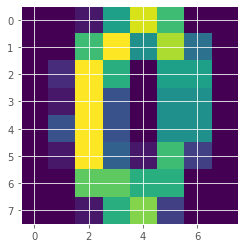

In [3]:
plt.imshow(X[10, :, :])

Инициализируйте классификатор с дефолтным числом соседей.

In [21]:
clf = KNeighborsClassifier()

In [22]:
#?KNeighborsClassifier

In [23]:
# вытягиваем квадратное изображение в вектор, чтобы получить матрицу объекты-признаки
X = X.reshape(X.shape[0], -1)

# перемешиваем данные
X, y = shuffle(X, y)
print(f"Features shape: {X.shape},\nTarget shape: {y.shape}")
print(f"Target samples: {y[:10]}")

Features shape: (1797, 64),
Target shape: (1797,)
Target samples: [3 0 1 6 7 3 6 9 3 0]


In [24]:
X_train, y_train = X[:700, :], y[:700]
X_val, y_val = X[700:1300, :], y[700:1300]
X_test, y_test = X[1300:, :], y[1300:]

Обучите классификатор и сделайте предсказания.

In [25]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Посчитайте долю правильных ответов (accuracy).

In [26]:
np.mean(y_pred == y_test)

0.9818913480885312

Попробуем использовать разные значения гиперпараметра k. Сравнивать разные значения k по обучающей выборке бесполезно: каждый объект является ближайшим сам к себе и оптимальное k будет равно 1. Будем сравнивать разные k по качеству на валидационной выборке:

In [27]:
for k in range(1, 20):
    clf =  KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_predicted = clf.predict(X_val)
    print(f"k = {k}; accuracy = {np.mean(y_val==y_predicted):.3f}")

k = 1; accuracy = 0.977
k = 2; accuracy = 0.967
k = 3; accuracy = 0.977
k = 4; accuracy = 0.970
k = 5; accuracy = 0.970
k = 6; accuracy = 0.967
k = 7; accuracy = 0.962
k = 8; accuracy = 0.963
k = 9; accuracy = 0.960
k = 10; accuracy = 0.960
k = 11; accuracy = 0.963
k = 12; accuracy = 0.963
k = 13; accuracy = 0.963
k = 14; accuracy = 0.963
k = 15; accuracy = 0.957
k = 16; accuracy = 0.960
k = 17; accuracy = 0.958
k = 18; accuracy = 0.952
k = 19; accuracy = 0.953


In [28]:
best_k = 1

Сравним точность (accuracy) на обучении, валидации и тесте:

In [29]:
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train, y_train)

for X_data, y_data in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    y_predicted = clf.predict(X_data)
    print(f"Accuracy: {np.mean(y_predicted==y_data):.3f}")

Accuracy: 1.000
Accuracy: 0.977
Accuracy: 0.984


### Grid Search

In [30]:
{'n_neighbors': np.arange(1, 20)}

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])}

In [31]:
clf_cv = GridSearchCV(estimator=clf,           
                      param_grid={'n_neighbors': np.arange(1, 20)}, 
                      cv=5,
                      scoring='accuracy')

In [32]:
clf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='accuracy')

In [33]:
clf_cv.best_params_

{'n_neighbors': 5}

In [34]:
cv_results = pd.DataFrame(clf_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000647,6.862888e-05,0.006196,0.000848,1,{'n_neighbors': 1},0.992857,0.964286,0.971429,0.971429,0.964286,0.972857,0.010498,4
1,0.000512,4.331509e-05,0.004882,0.000313,2,{'n_neighbors': 2},0.971429,0.971429,0.985714,0.957143,0.957143,0.968571,0.010690,5
2,0.000442,3.525778e-05,0.004389,0.000058,3,{'n_neighbors': 3},0.992857,0.985714,0.964286,0.971429,0.957143,0.974286,0.013248,2
3,0.000382,1.745836e-05,0.004440,0.000060,4,{'n_neighbors': 4},0.978571,0.992857,0.978571,0.957143,0.964286,0.974286,0.012454,2
4,0.000353,3.535033e-06,0.004371,0.000068,5,{'n_neighbors': 5},0.978571,0.992857,0.985714,0.964286,0.957143,0.975714,0.013248,1
5,0.000350,6.810597e-07,0.004439,0.000113,6,{'n_neighbors': 6},0.964286,0.971429,0.978571,0.957143,0.957143,0.965714,0.008330,8
6,0.000348,2.284841e-06,0.004336,0.000042,7,{'n_neighbors': 7},0.971429,0.985714,0.957143,0.964286,0.957143,0.967143,0.010690,6
7,0.000348,1.451027e-06,0.004340,0.000028,8,{'n_neighbors': 8},0.964286,0.985714,0.971429,0.950000,0.957143,0.965714,0.012289,7
8,0.000352,5.829127e-06,0.004412,0.000055,9,{'n_neighbors': 9},0.978571,0.971429,0.950000,0.957143,0.957143,0.962857,0.010498,9
9,0.000349,1.569946e-06,0.004392,0.000044,10,{'n_neighbors': 10},0.971429,0.964286,0.957143,0.964286,0.942857,0.960000,0.009689,11


In [35]:
n_neighbors = cv_results['param_n_neighbors']
mean_score = cv_results['mean_test_score']
std_score = cv_results['std_test_score']

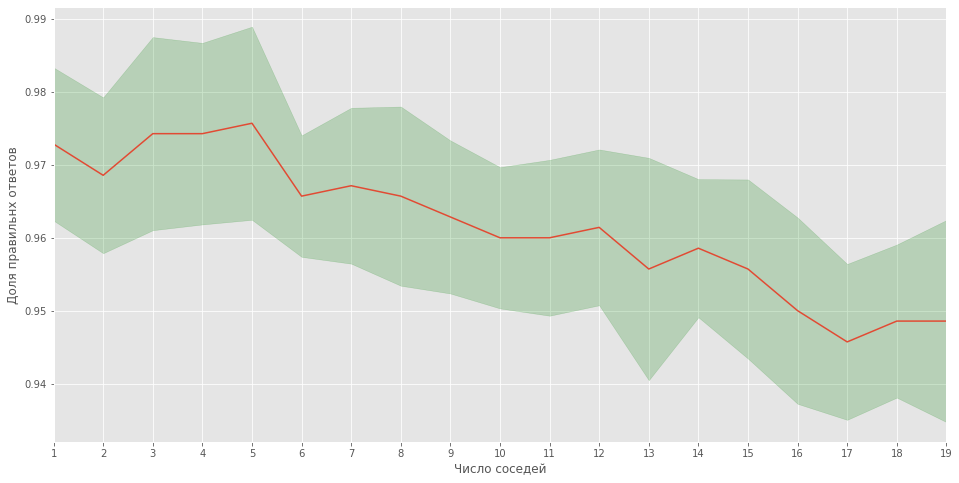

In [36]:
plt.figure(figsize=(16, 8))
plt.plot(n_neighbors, mean_score)
plt.fill_between(list(n_neighbors), mean_score - std_score, mean_score + std_score, alpha=0.2, color='green')
plt.xticks(list(n_neighbors))
plt.xlabel('Число соседей')
plt.ylabel('Доля правильнх ответов')
plt.xlim(min(n_neighbors), max(n_neighbors))
plt.show()